# Guide to onset threshold script

## Summary

This script (imd_onset_threshold.py) calculates 5-day wet spell thresholds from Indian Meteorological Department (IMD) rainfall data needed for first wet spell detection. It processes NetCDF files containing rainfall data and computes mean wet thresholds (**MWmean**) from April to October

## Script Details

### Data Flow

Input Data:
- Daily rainfall data from IMD stored in NetCDF files (*.nc)
- Multiple files are automatically combined

Processing Pipeline:
1. Ensure output directory exists
2. Load NetCDF files and rename variables
3. Detect the rainfall variable
3. Filter to monsoon season
4. Determine resolution
5. Compute MWmean and reshape back to MWmean back to (lat, lon) with metadata
6. Save to NetCDF and print basic stats and return

Ouput:
- NetCDF4 file with mean wet threshold (MWmean) for the first wet spell detection
- Variable: MWmean, Units: mm, Dimentions: [lat, lon]

### Functions

1. **standardize_coordinate_names()**

   Looks through ds.coords for common variants and renames to:
    - latitude -> lat
    - longitude -> lon
    - time/date -> TIME

2. **detect_rainfall_variable()**

    Find the precipitation variable (variable for rainfall)

3. **onset_agro_bis()**

    Compute monsoon onset indices and a wet-spell threshold per grid cell

4. **sequence_overlap(X, lseason, nday)**

    Build index matrices for overlapping sequences (rolling windows)

5. **determine_resolution(lats, lons)**

    Infer grid resolution in degrees.

6. **format_resolution_string(lat_res, lon_res)**

   Make a file-name-friendly tag for resolution e.g. 0p25X0p25, 2x2, etc.

7. **process_rainfall_data(input_dir, output_dir)**

   End-to-end pipeline to compute and save the wet-threshold field, using the above functions.


## Running the script

### Command

```bash
# Basic Usage

python imd_onset_threshold.py <input_dir> <output_directory>

# With verbose output

python imd_onset_threshold.py <input_dir> <output_directory> --verbose

```

## Output

### Output File

The script generates a NetCDF4 file with dynamic naming based on spatial resolution:
- 1° resolution → mwset1x1.nc4
- 0.25° resolution → mwset0p25x0p25.nc4
- 4° resolution → mwset4x4.nc4

The output file contains:
- Variable: MWmean (Mean wet threshold)
- Units: mm
- Description: Mean wet threshold for first wet spell detection
- Dimensions: [lat, lon]

Metadata Attributes
- long_name: Mean wet threshold
- units: mm
- spatial_resolution_lat/lon: Resolution in degrees
- algorithm_parameters: Algorithm configuration used
- source_variable: Original rainfall variable name

## Example: Explore the generated data with 2 degree resolution

In [5]:
import xarray as xr

# mwset2x2.nc4 is generated by running 2p0 rainfall data
ds_regen = xr.open_dataset("./exploratory/mwset2x2.nc4")
print(ds_regen)
# print(ds_regen.data_vars)

<xarray.Dataset> Size: 2kB
Dimensions:  (lat: 16, lon: 17)
Coordinates:
  * lat      (lat) int64 128B 8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38
  * lon      (lon) int64 136B 68 70 72 74 76 78 80 82 ... 88 90 92 94 96 98 100
Data variables:
    MWmean   (lat, lon) float64 2kB ...


In [6]:
print(ds_regen.data_vars)

Data variables:
    MWmean   (lat, lon) float64 2kB ...


In [3]:
print(ds_regen["MWmean"])

<xarray.DataArray 'MWmean' (lat: 16, lon: 17)> Size: 2kB
[272 values with dtype=float64]
Coordinates:
  * lat      (lat) int64 128B 8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38
  * lon      (lon) int64 136B 68 70 72 74 76 78 80 82 ... 88 90 92 94 96 98 100
Attributes:
    long_name:               Mean wet threshold
    units:                   mm
    description:             Mean wet threshold for first wet spell detection
    source_variable:         RAINFALL
    spatial_resolution_lat:  2.0 degrees
    spatial_resolution_lon:  2.0 degrees
    algorithm_parameters:    lseason=214, defdry=1, sw=5, wet=0, sd=10, dry=5...


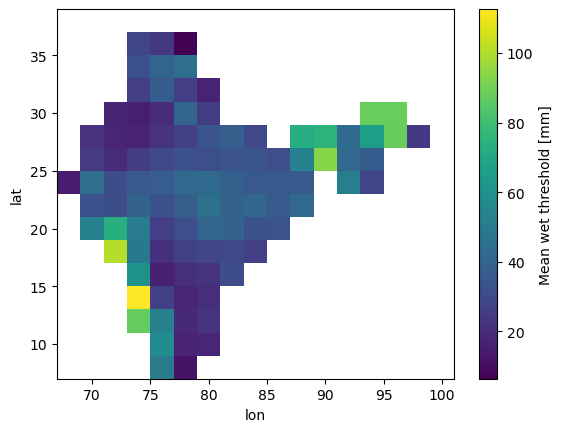

In [4]:
ds_regen["MWmean"].plot()

From the image, we could see that the southwest coast and far east of India have higher mean wet spell thresholds than the other regions, as shown in the image that the corresponding grids have lighter colour.